In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from astropy import units as u

In [3]:
class star:
    def __init__(self,a,e,p,m1,m2):
        self.a=a
        self.e=e
        self.p=(p*u.year).to(u.second).value
        self.m1=(m1*u.M_sun).value
        self.m2=(m2*u.M_sun).value
        self.a1=(m2/(m1+m2))*self.a
        self.a2=self.a-self.a1
        
    def setobserver(self,d,i,omega):
        self.d=((d*u.lightyear).to(u.km)).value
        self.i=np.deg2rad(i)
        self.omega=np.deg2rad(omega)
        self.a=((self.a*u.arcsecond).to(u.radian)).value * self.d
        self.a1 =((self.a1*u.arcsecond).to(u.radian)).value * self.d
        self.a2= ((self.a2*u.arcsecond).to(u.radian)).value * self.d  
        
    def totheta(self,time):
        p=(((self.p)*u.second).to(u.year)).value
        M = (2*np.pi/(p))*time
        E = [[0.1 for i in range(len(time))]]
        for _ in range(100):
            E.append(M + (self.e)*np.sin(E[-1]))
        E_final = E[-1]
        num1 = np.sqrt((1+self.e)/(1-self.e))
        num2 = np.tan(E_final/2)
        return 2*np.arctan(num1*num2)
    
    def radial_velocity_primary(self,time):
        theta=self.totheta(time)         
        num1 = (2*np.pi*self.a1*np.sin(self.i))
        denom1 = (self.p*np.sqrt(1 - (self.e)**2))
        num2 = (self.e)*np.cos(self.omega) + np.cos(theta + self.omega)
        return (num1 * num2 / denom1)
    
    def radial_velocity_secondary(self,time):
        theta=self.totheta(time)         
        num1 = (2*np.pi*self.a2*np.sin(self.i))
        denom1 = (self.p*np.sqrt(1 - (self.e)**2))
        num2 = (self.e)*np.cos(self.omega) + np.cos(theta + self.omega)
        return -(num1 * num2 / denom1)
   
    def radial_velocity_primary(self,time):
        theta=self.totheta(time)         
        num1 = (2*np.pi*self.a1*np.sin(self.i))
        denom1 = (self.p*np.sqrt(1 - (self.e)**2))
        num2 = (self.e)*np.cos(self.omega) + np.cos(theta + self.omega)
        return (num1 * num2 / denom1)
    
    def radial_velocity(self,time):
        theta=self.totheta(time)         
        num1 = (2*np.pi*self.a*np.sin(self.i))
        denom1 = (self.p*np.sqrt(1 - (self.e)**2))
        num2 = (self.e)*np.cos(self.omega) + np.cos(theta + self.omega)
        return -(num1 * num2 / denom1)
    
    def r1(self,theta):
        return ((self.a1)*(1-(self.e)**2))/(1+(self.e)*np.cos(theta))
    
    def r2(self,theta):
        return ((self.a2)*(1-(self.e)**2))/(1+(self.e)*np.cos(theta))
    


In [4]:
e = 0.5179
d = 4.37
i = 79.205
omega = 231.65
a = 17.57
p = 79.91
m1=1.100
m2=0.907

In [5]:
alpha_c=star(a,e,p,m1,m2)

In [6]:
alpha_c.setobserver(d,i,omega)

In [7]:
time=np.linspace(0,2*p,100)
rv1=alpha_c.radial_velocity_primary(time)
rv2=alpha_c.radial_velocity_secondary(time)
rv=alpha_c.radial_velocity(time)

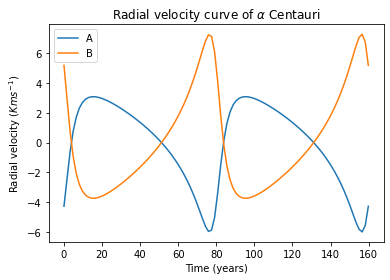

In [8]:
plt.plot(time,rv1,label='A')
plt.plot(time,rv2,label='B')
plt.xlabel(r"Time (years)")
plt.ylabel(r"Radial velocity ($Km s^{-1}$)")
plt.legend()
plt.title(r"Radial velocity curve of $\alpha$ Centauri")
plt.show()


In [9]:
thetas=np.linspace(0,2*np.pi,100)
r1=alpha_c.r1(thetas)
r2=alpha_c.r2(thetas)

In [26]:
fig=plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

In [27]:
ax=fig.add_subplot(1,1,1,projection='polar')

In [28]:
ax.plot(thetas,r1,label="A")
ax.plot(thetas+np.pi,r2,label="B")
ax.legend(loc=8)
fig.suptitle(r'Orbit of $\alpha$ Centauri A and $\alpha$ Centauri B')
fig.show()

<ipython-input-28-a106f810b5b3>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [29]:
fig.savefig('hey.png')